In [1]:
%matplotlib inline

In [15]:
from glob import glob
import os.path as op
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk

In [51]:
axial_index = 120

In [16]:
path = op.abspath('data')
fnames = glob(op.join(path, '*.nii*'))

def sitk_show(img, title=None, margin=0.05, dpi=40):
    nda = sitk.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    extent = (0, nda.shape[1] * spacing[1], nda.shape[0] * spacing[0], 0)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2 * margin, 1 - 2 * margin])
    plt.set_cmap("gray")
    ax.imshow(nda, extent=extent, interpolation=None)
    plt.title(title)
    
    plt.show()
    
white_matter = 1
gray_matter = 2

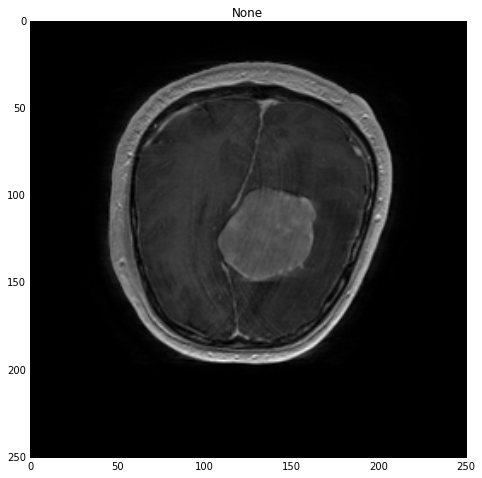

In [52]:
t1_img = sitk.ReadImage(fnames[0])
sitk_show(t1_img[:, :, axial_index])

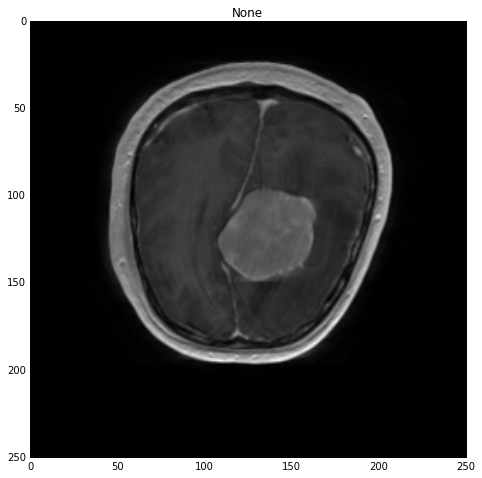

In [53]:
t1_img_smooth = sitk.CurvatureFlow(t1_img, timeStep=0.05)
sitk_show(t1_img_smooth[:, :, axial_index])

In [60]:
sitk.GetArrayFromImage(t1_img)[140, 140, 120]

844.0506

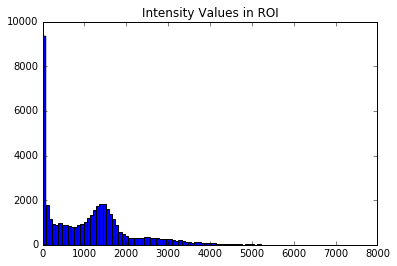

In [58]:
intensity_values = sitk.GetArrayFromImage(t1_img)
plt.hist(intensity_values[:, :, axial_index].flatten(), bins=100)
plt.title("Intensity Values")
plt.show() 